In [1]:
#--- IMPORT LIBRARY ---
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#--- LOAD DATA ---
Data_Churn = pd.read_csv('C:/Users/USER/Telco-Customer-Churn.csv')
Data_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#--- CLEANING DATA ---
df = Data_Churn.copy()

# Hapus kolom ID karena tidak berguna untuk prediksi
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Mengubah TotalCharges menjadi angka numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Hapus baris yang kosong
df_clean = df.dropna() 

print(df_clean.info())
print(f"\nJumlah baris awal: {len(Data_Churn)}")
print(f"\nJumlah baris setelah dibersihkan: {len(df_clean)}")

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
#--- DATA PREPROCESSING & EDA
# Data Processing
X= pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Auto Model Selection
models = [
    {'model': [LogisticRegression(max_iter=1000)], 'model__C': [0.1, 1, 10]},
    {'model': [RandomForestClassifier()], 'model__n_estimators': [50, 100, 200]}
]

pipeline = Pipeline([('model', LogisticRegression())])
grid = GridSearchCV(pipeline, models, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

#Best Model For Data Churn
print(f"\nModel Pemenang: {grid.best_params_['model']}")
print(f"Akurasi Terbaik: {grid.best_score_:.4f}")

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Lo

Model Pemenang: RandomForestClassifier()
Akurasi Terbaik: 0.7877


--- KLASIFIKASI ---
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



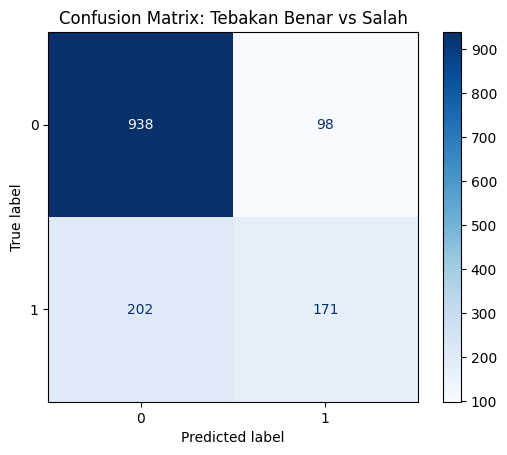

Model berhasil disimpan

--- FITUR PALING BERPENGARUH ---
                                    Fitur  Pengaruh
3                            TotalCharges  0.196645
1                                  tenure  0.167570
2                          MonthlyCharges  0.167279
10            InternetService_Fiber optic  0.038067
25                      Contract_Two year  0.035999
28         PaymentMethod_Electronic check  0.034076
4                             gender_Male  0.028220
26                   PaperlessBilling_Yes  0.026100
24                      Contract_One year  0.024673
13                     OnlineSecurity_Yes  0.024502
19                        TechSupport_Yes  0.023270
5                             Partner_Yes  0.023262
15                       OnlineBackup_Yes  0.021468
0                           SeniorCitizen  0.020424
9                       MultipleLines_Yes  0.020283
6                          Dependents_Yes  0.019778
17                   DeviceProtection_Yes  0.019492
23    

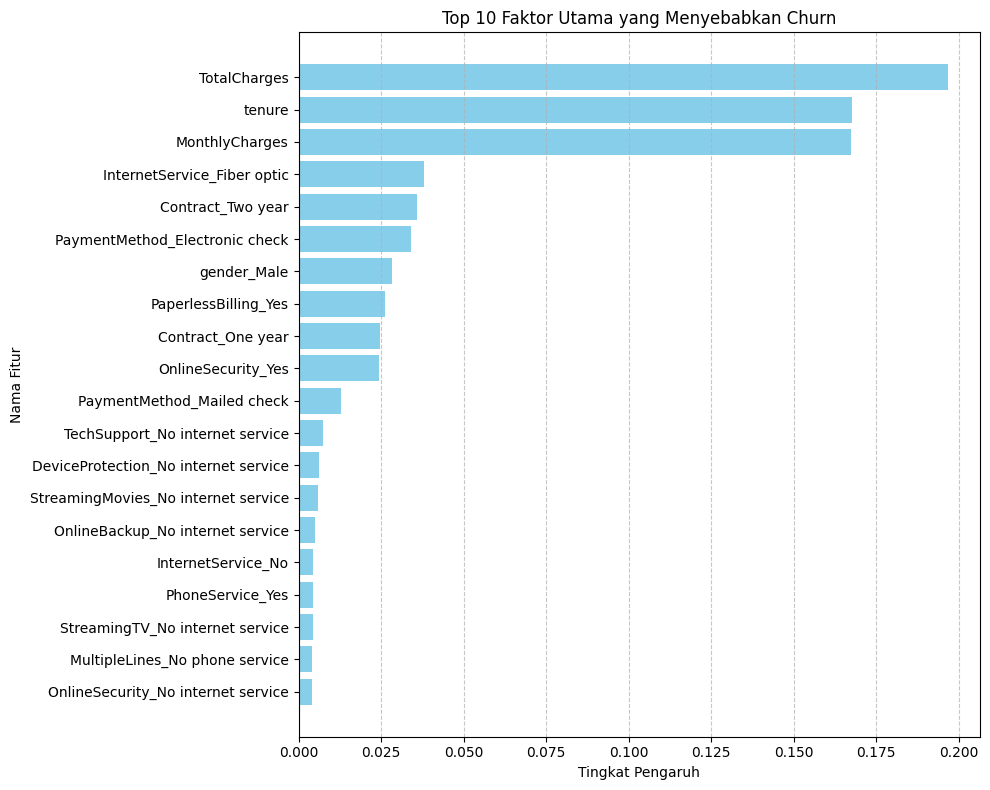

In [9]:
#--- MODELING & OPTIMIZATION ---
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("--- KLASIFIKASI ---")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Tebakan Benar vs Salah")
plt.show()

joblib.dump(best_model, 'model_churn_terbaik.pkl')
print("Model berhasil disimpan")

# Taking coefficients from the model in the pipeline
final_model = best_model.named_steps['model'].feature_importances_
features = X.columns

# Creating a dataframe makes reading easier
importance_df = pd.DataFrame({'Fitur': features, 'Pengaruh': final_model})
importance_df = importance_df.sort_values(by='Pengaruh', ascending=False)

print("\n--- FITUR PALING BERPENGARUH ---")
print(importance_df)

# Take the 10 features with the greatest positive influence and the 10 with the greatest negative influence.
top_features = pd.concat([importance_df.head(10), importance_df.tail(10)])

plt.figure(figsize=(10, 8))
plt.barh(top_features['Fitur'], top_features['Pengaruh'], color='skyblue')

plt.xlabel('Tingkat Pengaruh')
plt.ylabel('Nama Fitur')
plt.title('Top 10 Faktor Utama yang Menyebabkan Churn')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()